In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from transformers import TFBertForSequenceClassification, AutoTokenizer
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import nltk

c:\Users\aswai\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
BSO = pd.read_csv("BSO_data.txt")
DC = pd.read_csv("DC_data.txt", encoding='latin-1', on_bad_lines='skip')
SP = pd.read_csv("SP_data.txt", encoding='latin-1', on_bad_lines='skip')
SSP = pd.read_csv("SSP_data.txt", encoding='latin-1', on_bad_lines='skip')

In [3]:
BSO.head()

,value,S0,S1
0,0,"Superfluids , such as helium-4 below the lamb...",A superfluid acts as if it were a mixture of ...
1,0,Corresponding to a point in '''CP'''<sup>''n''...,":''Z''<sub>''n''</sub>] , there is a unique s..."
2,0,Because of the above-mentioned lack of a semi...,An alternative criticism is that general rel...
3,1,"(See , for example , the realization of the...",In a typical context where <math>\mathfrak{g...
4,0,"As a result , the equations become closed an...",Since <math>C</math> is typically much smalle...


In [4]:
DC.head()

,value,S0,S1,S2,S3,S4,S5
0,1,CAPE exists within the conditionally unstable ...,CAPE is measured in joules per kilogram of a...,Sound waves are pressure waves and it is at t...,Generic CAPE is calculated by integrating ve...,Where <math>z_\mathrm{f}</math> is the height ...,This integral is the work done by the buoyan...
1,1,The picture given in the preceding paragraphs ...,This is not relevant to determine the surfac...,The von Neumann description of quantum measur...,Then the probability of the measurement outco...,"In other words , the probability is obtained...",</math> * If the measured value is contained...
2,1,", no evidence of extraterrestrial life has b...",Examination of the Allan Hills 84001 meteorit...,"In heavy fermion materials , the non-perturb...","At a microscopic level , spheres are found i...",The carbon-rich spheres may have been formed ...,"On 5 March 2011 , Richard B. Hoover , a sc..."
3,0,The hyperbolic functions satisfy many identiti...,"In fact , '''Osborn's rule''' states that on...",Odd and even functions: :<math>\begin{align...,Hence: :<math>\begin{align} \t...,:<math>\begin{align} \operatorname{arsech}...,Hyperbolic sine and cosine satisfy: :<math>\b...
4,0,"In physics , the '''SchrÃ¶dinger picture''' i...",This differs from the Heisenberg picture whic...,The SchrÃ¶dinger and Heisenberg pictures are ...,"In the SchrÃ¶dinger picture , the state of ...",The evolution for a closed quantum system is ...,For time evolution from a state vector <math>...


In [5]:
SP.head()

,value,S0,S1,S2,S3,S4
0,0,'''Determinism''' is the philosophical view th...,Deterministic theories throughout the history...,The opposite of determinism is some kind of i...,Determinism is often contrasted with free wil...,Determinism often is taken to mean ''causal ...
1,4,Invertebrates that feed and shred larger leav...,Soil is the living top layer of mineral and or...,It is the chief organizing centre of most eco...,The decomposition of dead organic matter (for...,The whole of the planet's soil ecosystems is ...
2,2,"In the 1930s , the structures of much larger...","The first structure of an organic compound , ...",This was followed by several studies of long-...,A significant advance was the structure of ph...,X-ray crystallography of biological molecule...
3,1,The currently accepted value of the Chandrase...,The '''Chandrasekhar limit''' () is the maximu...,White dwarfs resist gravitational collapse p...,The Chandrasekhar limit is the mass above whi...,"Consequently , a white dwarf with a mass gr..."
4,3,It gives rise to (Ehresmann) connections on a...,"In mathematics , and especially differential ...",A '''principal ''G''-connection''' on a princ...,A principal connection can be viewed as a sp...,"In particular , on any associated vector bun..."


In [6]:
SSP.head()

,value,sentence
0,0,The inventors were Sir George Paget Thomson a...
1,0,Around 360 BCE when Plato proposed his idea ...
2,1,It is named after V. A. Fock who first introd...
3,0,It would be desirable that the method used fo...
4,1,"At high speeds , as shown in the figure at r..."


In [7]:
#loading Scibert model and tokenzier
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
BSO_model = TFBertForSequenceClassification.from_pretrained('allenai/scibert_scivocab_uncased', from_pt=True)
DC_model = TFBertForSequenceClassification.from_pretrained('allenai/scibert_scivocab_uncased', from_pt=True)
SP_model = TFBertForSequenceClassification.from_pretrained('allenai/scibert_scivocab_uncased', num_labels = 5, from_pt=True)
SSP_model = TFBertForSequenceClassification.from_pretrained('allenai/scibert_scivocab_uncased', from_pt=True)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly init

In [8]:
#function to tokenize each word in the sentences to input_ids and attention mask values
def tokenize_data(tokens_list_1, padding_value, max_length):
    tokens = tokenizer(tokens_list_1, padding=padding_value, truncation=True, return_tensors='tf', max_length=max_length)
    tokens_dict = {key: np.array(tf.convert_to_tensor(val)) for key, val in tokens.items()}
    return tokens_dict

In [9]:
#splits the data into a train/val/test split with a ratio specified by the user
#data is split into input_ids and attention mask values that are given to the model
def split_data(train_size, val_size, test_size, values, first_tokens, second_tokens = None, sample_size = None):
    if sample_size is not None:
        train_split = int(sample_size * train_size)
        val_split = int(train_split + (sample_size * val_size))
        test_split = int(val_split + (sample_size * test_size))
    else:
        train_split = int(len(first_tokens['input_ids']) * train_size)
        val_split = int(train_split + (len(first_tokens['input_ids']) * val_size))
        test_split = int(val_split + (len(first_tokens['input_ids']) * test_size))

    if second_tokens is not None:
        x_train_1 = (first_tokens['input_ids'][:train_split], first_tokens['attention_mask'][:train_split])
        x_train_2 = (second_tokens['input_ids'][:train_split], second_tokens['attention_mask'][:train_split])

        x_val_1 = (first_tokens['input_ids'][train_split:val_split], first_tokens['attention_mask'][train_split:val_split])
        x_val_2 = (second_tokens['input_ids'][train_split:val_split], second_tokens['attention_mask'][train_split:val_split])

        x_test_1 = (first_tokens['input_ids'][val_split:test_split], first_tokens['attention_mask'][val_split:test_split])
        x_test_2 = (second_tokens['input_ids'][val_split:test_split], second_tokens['attention_mask'][val_split:test_split])

        x_train = (x_train_1, x_train_2)
        x_val = (x_val_1, x_val_2)
        x_test = (x_test_1, x_test_2)
    
        y_train = np.array(values[:train_split])
        y_val = np.array(values[train_split:val_split])
        y_test = np.array(values[val_split:test_split])
    else:
        x_train = (first_tokens['input_ids'][:train_split], first_tokens['attention_mask'][:train_split])
        x_val = (first_tokens['input_ids'][train_split:val_split], first_tokens['attention_mask'][train_split:val_split])
        x_test = (first_tokens['input_ids'][val_split:test_split], first_tokens['attention_mask'][val_split:test_split])

        y_train = np.array(values[:train_split])
        y_val = np.array(values[train_split:val_split])
        y_test = np.array(values[val_split:test_split])

    return x_train, x_val, x_test, y_train, y_val, y_test

In [10]:
#class to define a model, train it, test it, and return the confusion matrix results.
class model_eval:
    def __init__(self, model):
        self.model = model
    
    def train(self, optimizer, loss_function, epochs, x_train, y_train, x_val, y_val):
        self.model.summary()
        self.model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
        self.model.fit(x_train, y_train, batch_size=64, epochs=epochs, verbose=2, validation_data=(x_val, y_val))
        
    def test(self, x_test, y_test):
        self.model.evaluate(x_test, y_test, batch_size=64, verbose=2)
    
    def confusion_matrix_results(self, x_test, y_test, average=None):
        y_true = np.array(y_test)
        y_pred_probabilites = self.model.predict(x_test)
        y_pred_probabilites = np.array(y_pred_probabilites.logits)
        y_pred = (y_pred_probabilites[:, 1] > 0.5).astype(np.int64)

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average=average)
        recall = recall_score(y_true, y_pred, average=average)
        f_1 = f1_score(y_true, y_pred, average=average)
        confusion_mat = confusion_matrix(y_true, y_pred)
      
        return accuracy, precision, recall, f_1, confusion_mat

In [11]:
#Preprocessing BSO dataset
#choosing sentences that have length of 100 or less and tokenzing data
BSOS0_tokens = []
BSOS1_tokens = []
BSO_values = []
i=0

for sentence1, sentence2 in zip(BSO['S0'],BSO['S1']):
    if ((len(sentence1) < 100) and (len(sentence2) < 100)):
        BSOS0_tokens.append(sentence1)
        BSOS1_tokens.append(sentence2)
        BSO_values.append(BSO['value'][i])
    i+=1

#dictionary that contains input_ids, attention_mask, and token_type_id values for each sentence
BSO_S0_tokens_dict = tokenize_data(BSOS0_tokens, 'max_length', 100)
BSO_S1_tokens_dict = tokenize_data(BSOS1_tokens, 'max_length', 100)

print(f"Number of BSO sentences with length of 100 or less: {len(BSOS0_tokens)}")
print(f"Input 1: {BSOS0_tokens[1]}")
print(f"Input 2: {BSOS1_tokens[1]}")
print(f"Input Id 1: {BSO_S0_tokens_dict['input_ids'][1]}\nAttention_mask 1: {BSO_S0_tokens_dict['attention_mask'][1]}")
print(f"Input Id 2: {BSO_S1_tokens_dict['input_ids'][1]}\nAttention_mask 2: {BSO_S1_tokens_dict['attention_mask'][1]}")

Number of BSO sentences with length of 100 or less: 35980
Input 1:  16 where the geodesics are numbered in order of increasing length
Input 2:   Four such geodesics are shown in Fig
Input Id 1: [  102  1107   582   111 21905 30113   220 26990   121   993   131  1953
  1755   103     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
Attention_mask 1: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [12]:
#Preprocessing DC dataset 
#choosing sentences that have a length of 200 or less
#converting six sentences to two inputs of three sentences each
DC_first_three_sentences = []
DC_next_three_sentences = []
DC_values = []
i=0

for sentence1, sentence2, sentence3, sentence4, sentence5, sentence6 in zip(DC['S0'],DC['S1'],DC['S2'],DC['S3'],DC['S4'],DC['S5']):
    if ((len(sentence1) < 200) and (len(sentence2) < 200) and (len(sentence3) < 200) and (len(sentence4) < 200) and (len(sentence5) < 200) and (len(sentence6) < 200)):
        DC_first_three_sentences.append(sentence1 + sentence2 + sentence3)
        DC_next_three_sentences.append(sentence4 + sentence5 + sentence6)
        DC_values.append(DC['value'][i])
    i+=1

DC_first_three_sentences_tokens_dict = tokenize_data(DC_first_three_sentences, 'max_length', 100)
DC_next_three_sentences_tokens_dict = tokenize_data(DC_next_three_sentences, 'max_length', 100)

print(f"Number of DC sentences with length of 200 or less: {len(DC_first_three_sentences)}")
print(f"Input 1: {DC_first_three_sentences[1]}")
print(f"Input 2: {DC_next_three_sentences[1]}")
print(f"Input Id 1: {DC_first_three_sentences_tokens_dict['input_ids'][1]}\nAttention_mask 1: {DC_first_three_sentences_tokens_dict['attention_mask'][1]}")
print(f"Input Id 2: {DC_next_three_sentences_tokens_dict['input_ids'][1]}\nAttention_mask 2: {DC_next_three_sentences_tokens_dict['attention_mask'][1]}")

Number of DC sentences with length of 200 or less: 7165
Input 1: The '''stability of a plasma''' is an important consideration in the study of plasma physics When a system containing a plasma is at equilibrium ,  it is possible for certain parts of the plasma to be disturbed by small perturbative forces acting on it The stability of the system determines if the perturbations will grow ,  oscillate ,  or be damped out
Input 2:   In many cases ,  a plasma can be treated as a fluid and its stability analyzed with magnetohydrodynamics (MHD) MHD theory is the simplest representation of a plasma ,  so MHD stability is a necessity for stable devices to be used for nuclear fusion ,  specifically magnetic fusion energy There are ,  however ,  other types of instabilities ,  such as velocity-space instabilities in magnetic mirrors and systems with beams
Input Id 1: [  102   111  2505  2505  2505  3318   131   106  2780  2505  2505  2505
   165   130  1060  5976   121   111   527   131  2780  633

In [13]:
#Preprocessing SP dataset
#choosing sentences that have a length of 170 or less
#converting 5 sentences to two inputs of three sentences and two sentences each
SP_first_three_sentences = []
SP_last_two_sentences = []
SP_values = []
i=0

for sentence1, sentence2, sentence3, sentence4, sentence5 in zip(SP['S0'],SP['S1'],SP['S2'],SP['S3'],SP['S4']):
    if ((len(sentence1) < 170) and (len(sentence2) < 170) and (len(sentence3) < 170) and (len(sentence4) < 170) and (len(sentence5) < 170)):
        SP_first_three_sentences.append(sentence1 + sentence2 + sentence3)
        SP_last_two_sentences.append(sentence4 + sentence5)
        SP_values.append(SP['value'][i])
    i+=1
    
SP_first_three_sentences_tokens_dict = tokenize_data(SP_first_three_sentences, 'max_length', 100)
SP_last_two_sentences_tokens_dict = tokenize_data(SP_last_two_sentences, 'max_length', 100)

print(f"Number of SP sentences with length of 170 or less: {len(SP_first_three_sentences)}")
print(f"Input 1: {SP_first_three_sentences[1]}")
print(f"Input 2: {SP_last_two_sentences[1]}")
print(f"Input Id 1: {SP_first_three_sentences_tokens_dict['input_ids'][1]}\nAttention_mask 1: {SP_first_three_sentences_tokens_dict['attention_mask'][1]}")
print(f"Input Id 2: {SP_last_two_sentences_tokens_dict['input_ids'][1]}\nAttention_mask 2: {SP_last_two_sentences_tokens_dict['attention_mask'][1]}")

Number of SP sentences with length of 170 or less: 5634
Input 1:  Translation commutes with the Hamiltonian: <math>[H , \mathbf{\hat T}]=0</math>For a free particle ,  the Hamiltonian <math>H = -\frac{\hbar^2}{2m} \nabla^2 </math> is invariant under translations However ,  if we express the Hamiltonian in the basis of the translation operator ,  we will find that <math>H</math> has doubly degenerate eigenvalues
Input 2:  It can be shown that to make the CSCO in this case ,  we need another operator called the parity operator <math>\Pi</math> ,  such that <math>[H , \Pi]=0</math><math>\{H , \Pi\}</math> forms a CSCO.
Input Id 1: [  102  5515 13808   123   190   111 11373   862   962  8242  1374   260
   151   422  4088  8242  9688  1342  4088  6500   105  3661  1901   275
   244   962  1352  8242  1374   168   106  2159  4166   422   111 11373
   962  8242  1374   151   275   579  4088 25418 30116  1342  4088 17194
 30114  7273   170  3661  1342   170 30119  3661  4088 23451  3054  7273

In [14]:
#Preprocessing SSP dataset
#choosing sentences that have a length of 100 or less
SSP_sentences = []
SSP_values = []
i = 0

for sentence in SSP['sentence']:
    if (len(sentence) < 100):
        SSP_sentences.append(sentence)
        SSP_values.append(SSP['value'][i])
    i+=1
    
SSP_sentences_tokens_dict = tokenize_data(SSP_sentences, 'max_length', 100)

print(f"Number of SSP sentences with length of 200 or less: {len(SSP_sentences)}")
print(f"Input: {SSP_sentences[1]}")
print(f"Input Id: {SSP_sentences_tokens_dict['input_ids'][1]}\nAttention_mask: {SSP_sentences_tokens_dict['attention_mask'][1]}")

Number of SSP sentences with length of 200 or less: 21771
Input:   Around 360 BCE when Plato proposed his idea to account for the motions
Input Id: [  102  2715 15560  6917 30107   603  3943 30112  1337  1972  4337   147
  2670   168   111 13318   103     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
Attention_mask: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
#splitting each dataset into 70/20/10 training, validation, and test splits
data_size = 5000
x_train_BSO, x_val_BSO, x_test_BSO, y_train_BSO, y_val_BSO, y_test_BSO = split_data(0.7, 0.2, 0.1, BSO_values, BSO_S0_tokens_dict, BSO_S1_tokens_dict, data_size)
x_train_DC, x_val_DC, x_test_DC, y_train_DC, y_val_DC, y_test_DC = split_data(0.7, 0.2, 0.1, DC_values, DC_first_three_sentences_tokens_dict, DC_next_three_sentences_tokens_dict, data_size)
x_train_SP, x_val_SP, x_test_SP, y_train_SP, y_val_SP, y_test_SP = split_data(0.7, 0.2, 0.1, SP_values, SP_first_three_sentences_tokens_dict, SP_last_two_sentences_tokens_dict, data_size)
x_train_SSP, x_val_SSP, x_test_SSP, y_train_SSP, y_val_SSP, y_test_SSP = split_data(0.7, 0.2, 0.1, SSP_values, SSP_sentences_tokens_dict, None, data_size)

print(f"length of BSO training data: {len(x_train_BSO[0][0])}")
print(f"length of BSO validation data: {len(x_val_BSO[0][0])}")
print(f"length of BSO testing data: {len(x_test_BSO[0][0])}\n")

print(f"length of DC training data: {len(x_train_DC[0][0])}")
print(f"length of DC validation data: {len(x_val_DC[0][0])}")
print(f"length of DC testing data: {len(x_test_DC[0][0])}\n")

print(f"length of SP training data: {len(x_train_SP[0][0])}")
print(f"length of SP validation data: {len(x_val_SP[0][0])}")
print(f"length of SP testing data: {len(x_test_SP[0][0])}\n")

print(f"length of SSP training data: {len(x_train_SSP[0])}")
print(f"length of SSP validation data: {len(x_val_SSP[0])}")
print(f"length of SSP testing data: {len(x_test_SSP[0])}")

length of BSO training data: 3500
length of BSO validation data: 1000
length of BSO testing data: 500

length of DC training data: 3500
length of DC validation data: 1000
length of DC testing data: 500

length of SP training data: 3500
length of SP validation data: 1000
length of SP testing data: 500

length of SSP training data: 3500
length of SSP validation data: 1000
length of SSP testing data: 500


In [215]:
#training SciBert model on BSO dataset
print('===Training SciBert model on BSO dataset===\n')
BSOmodel = model_eval(BSO_model)
opt = tf.keras.optimizers.Adam(learning_rate=0.00003)
BSOmodel.train(opt, 'binary_crossentropy', 9, x_train_BSO, y_train_BSO, x_val_BSO, y_val_BSO)

===Training SciBert model on BSO dataset===

Model: "tf_bert_for_sequence_classification_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109918464 
                                                                 
 dropout_1022 (Dropout)      multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109920002 (419.31 MB)
Trainable params: 109920002 (419.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/9
55/55 - 1570s - loss: 2.1265 - accuracy: 0.4360 - val_loss: 1.0116 - val_accuracy: 0.4930 - 1570s/epoch - 29s/step
Epoch 2/9
55/55 - 1526s - loss: 0.5058 - accuracy: 0.4957 - val_loss: 2.6300

In [216]:
#testing SciBert on BSO dataset
print('===Testing SciBert model on BSO dataset===\n')
BSOmodel.test(x_test_BSO, y_test_BSO)
BSO_accuracy, BSO_precision, BSO_recall, BSO_f1score, BSO_confusion_mat = BSOmodel.confusion_matrix_results(x_test_BSO, y_test_BSO, average = 'weighted')

print(f"accuracy = {BSO_accuracy}")
print(f"precision = {BSO_precision}")
print(f"recall = {BSO_recall}")
print(f"F1-Score = {BSO_f1score}")
print(f"confusion matrix = {BSO_confusion_mat}")

===Testing SciBert model on BSO dataset===

8/8 - 66s - loss: 4.6676 - accuracy: 0.5020 - 66s/epoch - 8s/step
16/16 [==============================] - 72s 4s/step
accuracy = 0.504
precision = 0.5040637480798771
recall = 0.504
F1-Score = 0.5040238114288457
confusion matrix = [[129 125]
 [123 123]]


In [217]:
#training SciBert model on DC dataset
print('===Training SciBert model on DC dataset===\n')
DCmodel = model_eval(DC_model)
opt = tf.keras.optimizers.Adam(learning_rate=0.00003)
DCmodel.train(opt, 'binary_crossentropy', 6, x_train_DC, y_train_DC, x_val_DC, y_val_DC)

===Training SciBert model on DC dataset===

Model: "tf_bert_for_sequence_classification_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109918464 
                                                                 
 dropout_1060 (Dropout)      multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109920002 (419.31 MB)
Trainable params: 109920002 (419.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/6
55/55 - 1539s - loss: 0.7253 - accuracy: 0.5109 - val_loss: 0.6709 - val_accuracy: 0.4450 - 1539s/epoch - 28s/step
Epoch 2/6
55/55 - 1604s - loss: 0.6878 - accuracy: 0.5197 - val_loss: 0.6965 

In [218]:
#testing SciBert model on DC dataset
print('===Testing SciBert model on DC dataset===\n')
DCmodel.test(x_test_DC, y_test_DC)
DC_accuracy, DC_precision, DC_recall, DC_f1score, DC_confusion_mat = DCmodel.confusion_matrix_results(x_test_DC, y_test_DC, average='weighted')

print(f"accuracy = {DC_accuracy}")
print(f"precision = {DC_precision}")
print(f"recall = {DC_recall}")
print(f"F1-Score = {DC_f1score}")
print(f"confusion matrix = {DC_confusion_mat}")

===Testing SciBert model on DC dataset===

8/8 - 66s - loss: 1.9766 - accuracy: 0.4560 - 66s/epoch - 8s/step
16/16 [==============================] - 81s 4s/step
accuracy = 0.68
precision = 0.6938730369387304
recall = 0.68
F1-Score = 0.663173937892932
confusion matrix = [[239  36]
 [124 101]]


In [195]:
#training SciBert model on SP dataset
print('===Training SciBert model on SP dataset===\n')
SPmodel = model_eval(SP_model)
opt = tf.keras.optimizers.Adam(learning_rate=0.00003)
SPmodel.train(opt, 'sparse_categorical_crossentropy', 5, x_train_SP, y_train_SP, x_val_SP, y_val_SP)

===Training SciBert model on SP dataset===

Model: "tf_bert_for_sequence_classification_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109918464 
                                                                 
 dropout_1098 (Dropout)      multiple                  0         
                                                                 
 classifier (Dense)          multiple                  3845      
                                                                 
Total params: 109922309 (419.32 MB)
Trainable params: 109922309 (419.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
55/55 - 1645s - loss: 5.9960 - accuracy: 0.2009 - val_loss: 4.4424 - val_accuracy: 0.1990 - 1645s/epoch - 30s/step
Epoch 2/5
55/55 - 1571s - loss: 4.5121 - accuracy: 0.2120 - val_loss: 4.2858 

In [196]:
#testing SciBert model on SP dataset
print('===Testing SciBert model on SP dataset===\n')
SPmodel.test(x_test_SP, y_test_SP)
SP_accuracy, SP_precision, SP_recall, SP_f1score, SP_confusion_mat = SPmodel.confusion_matrix_results(x_test_SP, y_test_SP, average='weighted')

print(f"accuracy = {SP_accuracy}")
print(f"precision = {SP_precision}")
print(f"recall = {SP_recall}")
print(f"F1-Score = {SP_f1score}")
print(f"confusion matrix = {SP_confusion_mat}")

===Testing SciBert model on SP dataset===

8/8 - 67s - loss: 1.6097 - accuracy: 0.1940 - 67s/epoch - 8s/step
16/16 [==============================] - 80s 4s/step
accuracy = 0.172
precision = 0.029583999999999996
recall = 0.172
F1-Score = 0.050484641638225254
confusion matrix = [[  0  97   0   0   0]
 [  0  86   0   0   0]
 [  0  99   0   0   0]
 [  0 112   0   0   0]
 [  0 106   0   0   0]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [197]:
#training SciBert model on SSP dataset
print('===Training SciBert model on SSP dataset===\n')
SSPmodel = model_eval(SSP_model)
opt = tf.keras.optimizers.Adam(learning_rate=0.00003)
SSPmodel.train(opt, 'binary_crossentropy', 5, x_train_SSP, y_train_SSP, x_val_SSP, y_val_SSP)

===Training SciBert model on SSP dataset===

Model: "tf_bert_for_sequence_classification_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109918464 
                                                                 
 dropout_1136 (Dropout)      multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109920002 (419.31 MB)
Trainable params: 109920002 (419.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
55/55 - 1626s - loss: 0.7460 - accuracy: 0.5006 - val_loss: 0.8509 - val_accuracy: 0.5430 - 1626s/epoch - 30s/step
Epoch 2/5
55/55 - 1556s - loss: 0.6577 - accuracy: 0.5120 - val_loss: 0.6322

In [198]:
#testing SciBert model on SSP dataset
print('===Testing SciBert model on SSP dataset===\n')
SSPmodel.test(x_test_SSP, y_test_SSP)
SSP_accuracy, SSP_precision, SSP_recall, SSP_f1score, SSP_confusion_mat = SSPmodel.confusion_matrix_results(x_test_SSP, y_test_SSP, average='weighted')

print(f"accuracy = {SSP_accuracy}")
print(f"precision = {SSP_precision}")
print(f"recall = {SSP_recall}")
print(f"F1-Score = {SSP_f1score}")
print(f"confusion matrix = {SSP_confusion_mat}")

===Testing SciBert model on SSP dataset===

8/8 - 65s - loss: 0.8776 - accuracy: 0.5640 - 65s/epoch - 8s/step
16/16 [==============================] - 79s 4s/step
accuracy = 0.63
precision = 0.6304118186646068
recall = 0.63
F1-Score = 0.6301832723231005
confusion matrix = [[178  94]
 [ 91 137]]


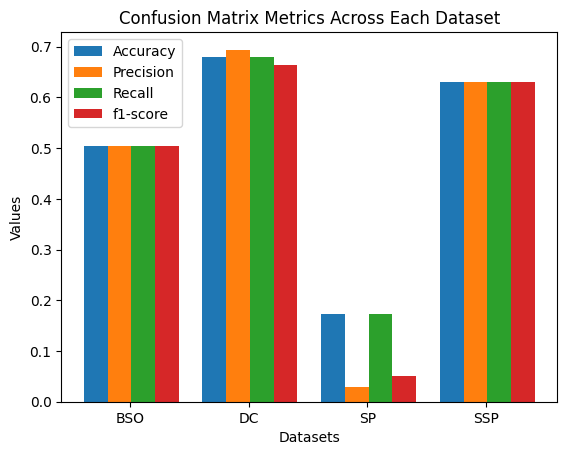

In [219]:
#model results on each dataset
dataset = ['BSO', 'DC', 'SP', 'SSP']
metrics = ['Accuracy', 'Precision', 'Recall', 'f1-score']

acc_results = [BSO_accuracy, DC_accuracy, SP_accuracy, SSP_accuracy]
prec_results = [BSO_precision, DC_precision, SP_precision, SSP_precision]
recall_results = [BSO_recall, DC_recall, SP_recall, SSP_recall]
f1_results = [BSO_f1score, DC_f1score, SP_f1score, SSP_f1score]
values = np.array([acc_results, prec_results, recall_results, f1_results])

# Plotting
bar_width = 0.2
index = np.arange(len(dataset))
fig, axis = plt.subplots()

for i, metrics in enumerate(metrics):
    bars = axis.bar(index + i * bar_width+0.41, values[i], bar_width, label=metrics)
    
axis.set_xticks(index + (bar_width * (len(metrics) - 1)) / 2)
axis.set_xticklabels(dataset)

plt.title('Confusion Matrix Metrics Across Each Dataset')
plt.xlabel('Datasets')
plt.ylabel('Values')
axis.legend()
plt.show()

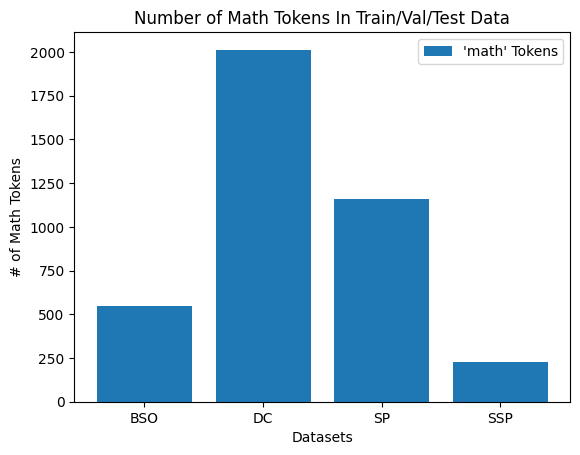

In [341]:
#plotting the number of <math> tags in each dataset to see how many equations were present in the training, validation, and test sets
BSO_sentence_one_tokens = []
BSO_sentence_two_tokens = []
DC_sentence_123_tokens = []
DC_sentence_456_tokens = []
SP_sentence_123_tokens = []
SP_sentence_45_tokens = []
SSP_sentence_tokens = []

#tokenizing each sentence in the train/val/test splits
for sentence_one, sentence_two in zip(BSO['S0'],BSO['S1']):
    if ((len(sentence_one) < 100) and (len(sentence_two) < 100)):
        BSO_sentence_one_tokens.append(nltk.word_tokenize(sentence_one))
        BSO_sentence_two_tokens.append(nltk.word_tokenize(sentence_two))

for sentence_one, sentence_two, sentence_three, sentence_four, sentence_five, sentence_six in zip(DC['S0'],DC['S1'],DC['S2'],DC['S3'],DC['S4'],DC['S5']):
    if ((len(sentence_one) < 200) and (len(sentence_two) < 200) and (len(sentence_three) < 200) and (len(sentence_four) < 200) and (len(sentence_five) < 200) and (len(sentence_six) < 200)):
        DC_sentence_123_tokens.append(nltk.word_tokenize(sentence_one+sentence_two+sentence_three))
        DC_sentence_456_tokens.append(nltk.word_tokenize(sentence_four+sentence_five+sentence_six))

for sentence_one, sentence_two, sentence_three, sentence_four, sentence_five in zip(SP['S0'],SP['S1'],SP['S2'],SP['S3'],SP['S4']):
    if ((len(sentence_one) < 170) and (len(sentence_two) < 170) and (len(sentence_three) < 170) and (len(sentence_four) < 170) and (len(sentence_five) < 170)):
        SP_sentence_123_tokens.append(nltk.word_tokenize(sentence_one+sentence_two+sentence_three))
        SP_sentence_45_tokens.append(nltk.word_tokenize(sentence_four+sentence_five))

for sentence in SSP['sentence']:
    if (len(sentence) < 100):
        SSP_sentence_tokens.append(nltk.word_tokenize(sentence))

BSO_math_tokens = 0
DC_math_tokens = 0
SP_math_tokens = 0
SSP_math_tokens = 0

#counting how many math tags were present in each dataset
for sentence_one_tokens, sentence_two_tokens in zip(BSO_sentence_one_tokens[:data_size], BSO_sentence_two_tokens[:data_size]):
    for each_token_one, each_token_two in zip(sentence_one_tokens, sentence_two_tokens):
        if (each_token_one == 'math'):
            BSO_math_tokens +=1
        if (each_token_two == 'math'):
            BSO_math_tokens +=1

for sentence_one_tokens, sentence_two_tokens in zip(DC_sentence_123_tokens[:data_size], DC_sentence_456_tokens[:data_size]):
    for each_token_one, each_token_two in zip(sentence_one_tokens, sentence_two_tokens):
        if (each_token_one == 'math'):
            DC_math_tokens +=1
        if (each_token_two == 'math'):
            DC_math_tokens +=1

for sentence_one_tokens, sentence_two_tokens in zip(SP_sentence_123_tokens[:data_size], SP_sentence_45_tokens[:data_size]):
    for each_token_one, each_token_two in zip(sentence_one_tokens, sentence_two_tokens):
        if (each_token_one == 'math'):
            SP_math_tokens +=1
        if (each_token_two == 'math'):
            SP_math_tokens +=1

for sentence_one_tokens in SSP_sentence_tokens[:data_size]:
    for each_token in sentence_one_tokens:
        if (each_token == 'math'):
            SSP_math_tokens +=1
        
dataset = ['BSO', 'DC', 'SP', 'SSP']
math_token_values = np.array([BSO_math_tokens, DC_math_tokens, SP_math_tokens, SSP_math_tokens])

plt.bar(dataset, math_token_values)
plt.title('Number of Math Tokens In Train/Val/Test Data')
plt.xlabel('Datasets')
plt.ylabel('# of Math Tokens')
plt.legend(["'math' Tokens"])
plt.show()

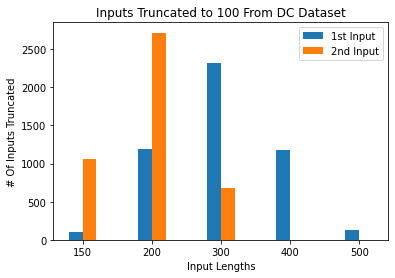

In [19]:
#counting how many sentences of a specified length in the DC dataset were truncated to 100
DC_trunc_500 = 0
DC_trunc_400 = 0
DC_trunc_300 = 0
DC_trunc_200 = 0
DC_trunc_150 = 0

DC_trunc_2_500 = 0
DC_trunc_2_400 = 0
DC_trunc_2_300 = 0
DC_trunc_2_200 = 0
DC_trunc_2_150 = 0

i=0
for sentence1, sentence2, sentence3, sentence4, sentence5, sentence6 in zip(DC['S0'],DC['S1'],DC['S2'],DC['S3'],DC['S4'],DC['S5']):
    if ((len(sentence1) < 200) and (len(sentence2) < 200) and (len(sentence3) < 200) and (len(sentence4) < 200) and (len(sentence5) < 200) and (len(sentence6) < 200)):
        if(len(sentence1+sentence2+sentence3) > 500):
            DC_trunc_500+=1
        if(len(sentence1+sentence2+sentence3) > 400 and (len(sentence1+sentence2+sentence3) < 500)):
            DC_trunc_400+=1
        if(len(sentence1+sentence2+sentence3) > 300 and len(sentence1+sentence2+sentence3) < 400):
            DC_trunc_300+=1
        if(len(sentence1+sentence2+sentence3) > 200 and len(sentence1+sentence2+sentence3) < 300):
            DC_trunc_200+=1
        if(len(sentence1+sentence2+sentence3) > 150 and len(sentence1+sentence2+sentence3) < 200):
            DC_trunc_150+=1
        if(len(sentence4+sentence5) > 500):
            DC_trunc_2_500+=1
        if(len(sentence4+sentence5) > 400 and len(sentence4+sentence5) < 500):
            DC_trunc_2_400+=1
        if(len(sentence4+sentence5) > 300 and len(sentence4+sentence5) < 400):
            DC_trunc_2_300+=1
        if(len(sentence4+sentence5) > 200 and len(sentence4+sentence5) < 300):
            DC_trunc_2_200+=1
        if(len(sentence4+sentence5) > 150 and len(sentence4+sentence5) < 200):
            DC_trunc_2_150+=1
        i+=1
    if (i==data_size):
        break
        
DC_x_values = ['150', '200', '300', '400', '500']
DC_metrics = ['1st Input', '2nd Input']

DC_first_input = [DC_trunc_150, DC_trunc_200, DC_trunc_300, DC_trunc_400, DC_trunc_500]
DC_second_input = [DC_trunc_2_150, DC_trunc_2_200, DC_trunc_2_300, DC_trunc_2_400, DC_trunc_2_500]
DC_trunc_values = np.array([DC_first_input, DC_second_input])

bar_width = 0.2
index = np.arange(len(DC_x_values))
fig, axis = plt.subplots()

for i, DC_metrics in enumerate(DC_metrics):
    bars = axis.bar(index + i * bar_width+0.7, DC_trunc_values[i], bar_width, label=DC_metrics)
    
axis.set_xticks(index + (bar_width * (len(DC_metrics) - 1)) / 2)
axis.set_xticklabels(DC_x_values)

plt.title('Inputs Truncated to 100 From DC Dataset')
plt.xlabel('Input Lengths')
plt.ylabel('# Of Inputs Truncated')
axis.legend()
plt.show()

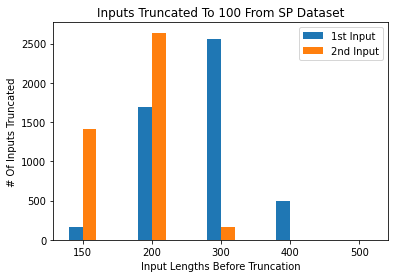

In [20]:
#counting how many sentences of a specified length in the SP dataset were truncated to 100
SP_trunc_500 = 0
SP_trunc_400 = 0
SP_trunc_300 = 0
SP_trunc_200 = 0
SP_trunc_150 = 0

SP_trunc_2_500 = 0
SP_trunc_2_400 = 0
SP_trunc_2_300 = 0
SP_trunc_2_200 = 0
SP_trunc_2_150 = 0

i=0
for sentence1, sentence2, sentence3, sentence4, sentence5 in zip(SP['S0'],SP['S1'],SP['S2'],SP['S3'],SP['S4']):
    if ((len(sentence1) < 170) and (len(sentence2) < 170) and (len(sentence3) < 170) and (len(sentence4) < 170) and (len(sentence5) < 170)):
        if(len(sentence1+sentence2+sentence3) > 500):
            SP_trunc_500+=1
        if(len(sentence1+sentence2+sentence3) > 400 and (len(sentence1+sentence2+sentence3) < 500)):
            SP_trunc_400+=1
        if(len(sentence1+sentence2+sentence3) > 300 and len(sentence1+sentence2+sentence3) < 400):
            SP_trunc_300+=1
        if(len(sentence1+sentence2+sentence3) > 200 and len(sentence1+sentence2+sentence3) < 300):
            SP_trunc_200+=1
        if(len(sentence1+sentence2+sentence3) > 150 and len(sentence1+sentence2+sentence3) < 200):
            SP_trunc_150+=1
        if(len(sentence4+sentence5) > 500):
            SP_trunc_2_500+=1
        if(len(sentence4+sentence5) > 400 and len(sentence4+sentence5) < 500):
            SP_trunc_2_400+=1
        if(len(sentence4+sentence5) > 300 and len(sentence4+sentence5) < 400):
            SP_trunc_2_300+=1
        if(len(sentence4+sentence5) > 200 and len(sentence4+sentence5) < 300):
            SP_trunc_2_200+=1
        if(len(sentence4+sentence5) > 150 and len(sentence4+sentence5) < 200):
            SP_trunc_2_150+=1
        i+=1
    if (i==data_size):
        break
    
SP_x_values = ['150', '200', '300', '400', '500']
SP_metrics = ['1st Input', '2nd Input']

SP_first_input = [SP_trunc_150, SP_trunc_200, SP_trunc_300, SP_trunc_400, SP_trunc_500]
SP_second_input = [SP_trunc_2_150, SP_trunc_2_200, SP_trunc_2_300, SP_trunc_2_400, SP_trunc_2_500]
SP_trunc_values = np.array([SP_first_input, SP_second_input])

bar_width = 0.2
index = np.arange(len(SP_x_values))
fig, axis = plt.subplots()

for i, SP_metrics in enumerate(SP_metrics):
    bars = axis.bar(index + i * bar_width+0.7, SP_trunc_values[i], bar_width, label=SP_metrics)
    
axis.set_xticks(index + (bar_width * (len(SP_metrics) - 1)) / 2)
axis.set_xticklabels(SP_x_values)

plt.title('Inputs Truncated To 100 From SP Dataset')
plt.xlabel('Input Lengths Before Truncation')
plt.ylabel('# Of Inputs Truncated')
axis.legend()
plt.show()

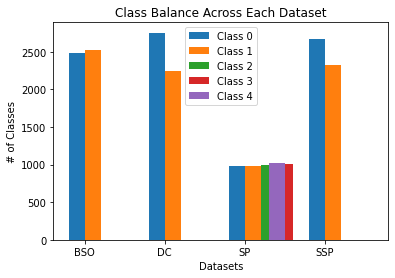

In [21]:
#counting how the number of classes in each dataset to check for class imbalances
BSO_one = 0
BSO_zero = 0
DC_one = 0
DC_zero = 0
SP_zero = 0
SP_one = 0
SP_two = 0
SP_three = 0
SP_four = 0
SSP_one = 0
SSP_zero = 0

for value in BSO_values[:data_size]:
    if value == 0:
        BSO_zero+=1
    elif value == 1:
        BSO_one+=1

for value in DC_values[:data_size]:
    if value == 0:
        DC_zero+=1
    elif value == 1:
        DC_one+=1

for value in SP_values[:data_size]:
    if value == 0:
        SP_zero+=1
    elif value == 1:
        SP_one+=1
    elif value == 2:
        SP_two+=1
    elif value == 3:
        SP_three+=1
    elif value == 4:
        SP_four +=1

for value in SSP_values[:data_size]:
    if value == 0:
        SSP_zero+=1
    elif value == 1:
        SSP_one+=1

dataset = ['BSO', 'DC', 'SP', 'SSP']
metrics = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

zeros = [BSO_zero, DC_zero, SP_zero, SSP_zero]
ones = [BSO_one, DC_one, SP_one, SSP_one]
twos = [0, 0, SP_two, 0]
threes = [0, 0, SP_three, 0]
fours = [0, 0, SP_four, 0]
values = np.array([zeros, ones, twos, threes, fours])

# Plotting
bar_width = 0.2
index = np.arange(len(dataset))
fig, axis = plt.subplots()

for i, metrics in enumerate(metrics):
    if i==4:
        bars = axis.bar(index + i * bar_width+0.2, values[i], bar_width, label=metrics)
    else:
        bars = axis.bar(index + i * bar_width+0.50, values[i], bar_width, label=metrics)
    
axis.set_xticks(index + (bar_width * (len(metrics) - 1)) / 2)
axis.set_xticklabels(dataset)

plt.title('Class Balance Across Each Dataset')
plt.xlabel('Datasets')
plt.ylabel('# of Classes')
axis.legend()
plt.show()